In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pickle
import json

with open("energies_int_500.pkl", 'rb') as file:
    energies_int = pickle.load(file)

with open("energies_errors_500.pkl", 'rb') as file:
    energies_errors = pickle.load(file)

with open("energies_single_500.pkl", "rb") as file:
    energies_single = pickle.load(file)

with open("occupied_info_500.pkl", "rb") as file:
    occupied_info = pickle.load(file)

with open("occupied_levels_500.pkl", "rb") as file:
    occupied_levels = pickle.load(file)
    
# Initialize the states dictionary
states = {}
# state_num, value

# Load the pickled files into the dictionary
for i in range(10):
    try:
        with open(f"state500_{i}.pkl", "rb") as file:
            states[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

In [2]:
energies_errors_2 = []
analytic_energies = np.zeros(10)
l = 5
points = 500
x = np.linspace(0, l, points)
dx = x[1] - x[0]
for i in range(len(analytic_energies)):
    analytic_energies[i] = ((i+1)**2) / (2*((l+2*dx)**2))


energies_errors_2 = np.abs(analytic_energies - energies_single)
print(energies_errors_2)
print(max(energies_errors), max(energies_errors_2))

[5.93619149e-05 3.74476596e-05 1.34257234e-04 2.49790638e-04
 3.84047872e-04 6.37028936e-04 8.08733830e-04 1.09916255e-03
 1.40831511e-03 1.73619149e-03]
0.01419999999999999 0.0017361914892772834


(500, 500)
(500, 500)


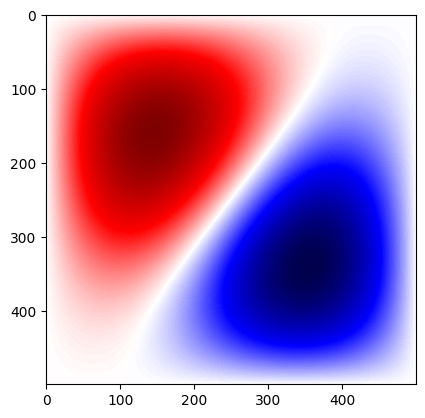

In [3]:
ground = states[1]

def wave_function(l, n, X):
    return np.sqrt(2/l) * np.sin((np.pi) * X * (n+1) / l)
x_1 = np.linspace(0, 5, 500)
x_2 = np.linspace(0, 5, 500)
X_1, X_2 = np.meshgrid(x_1, x_2)
ground_analytic = (1 / np.sqrt(2))*(wave_function(5, 0, X_1) * wave_function(5, 1, X_2) + wave_function(5, 0, X_2) * wave_function(5, 1, X_1))
print(ground_analytic.shape)
print(ground.space.shape)

plt.imshow(ground.space.real, cmap="seismic", vmax=np.max(ground.space.real), vmin=-np.max(ground.space.real))
plt.show()


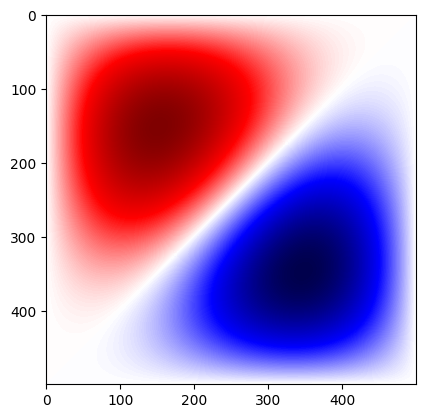

In [4]:
plt.imshow(ground_analytic, cmap="seismic", vmax=np.max(ground_analytic), vmin=-np.max(ground_analytic))

In [5]:
print(np.isclose(ground_analytic, ground.space.real, rtol=1e-4, atol=1e-6))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [6]:
with open("occupations_500.json", "w") as f:
    json.dump(occupied_levels, f)

for key, value in occupied_levels.items():
    print(f'{key}: {value}')
    print('---') 

State = 0: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0199, 0.0199]', 'Total energy = 0.0398')
---
State = 1: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0199, 0.0794]', 'Total energy = 0.0993')
---
State = 2: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0794, 0.0199]', 'Total energy = 0.0993')
---
State = 3: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0794, 0.0794]', 'Total energy = 0.1588')
---
State = 4: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [2]', 'Energy of occupied orbitals: [0.0199, 0.1787]', 'Total energy = 0.1986')
---
State = 5: ('Orbitals occupied by up: [2]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.1787, 0.0199]', 'Total energy = 0.1986')
---
State = 6: ('Orbitals occupied by up: [1]', 'Orbitals occupied b

In [7]:
# print results

print("Energies of interacting method 'ud'")
for i, value in enumerate(energies_int):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Energies of interacting method 'u'\n")
for i, value in enumerate(energies_single):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Errors")
for i, value in enumerate(energies_errors):
    print(f"State = {i}, error = {value} per pi squared")
    

Energies of interacting method 'ud'
State = 0, energy = 0.0397 per pi squared
State = 1, energy = 0.0993 per pi squared
State = 2, energy = 0.0993 per pi squared
State = 3, energy = 0.1589 per pi squared
State = 4, energy = 0.1986 per pi squared
State = 5, energy = 0.1986 per pi squared
State = 6, energy = 0.2582 per pi squared
State = 7, energy = 0.2582 per pi squared
State = 8, energy = 0.3376 per pi squared
State = 9, energy = 0.3376 per pi squared

Energies of interacting method 'u'

State = 0, energy = 0.0199 per pi squared
State = 1, energy = 0.0794 per pi squared
State = 2, energy = 0.1787 per pi squared
State = 3, energy = 0.3177 per pi squared
State = 4, energy = 0.4964 per pi squared
State = 5, energy = 0.7149 per pi squared
State = 6, energy = 0.973 per pi squared
State = 7, energy = 1.2709 per pi squared
State = 8, energy = 1.6085 per pi squared
State = 9, energy = 1.9858 per pi squared

Errors
State = 0, error = 9.99999999999994e-05 per pi squared
State = 1, error = 0.0006

In [8]:
# print the degenerate states

for i in range(len(energies_int)):
    if energies_int[i] == energies_int[i-1]:
        print(f"State {i-1} and {i} have the same energy")

State 1 and 2 have the same energy
State 4 and 5 have the same energy
State 6 and 7 have the same energy
State 8 and 9 have the same energy


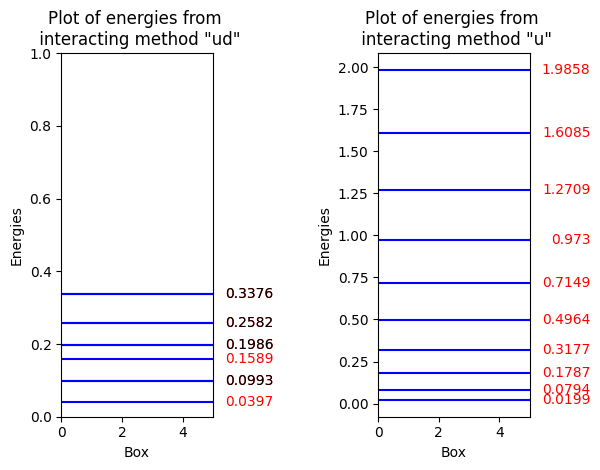

In [9]:
# plot the energies

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim(0, 5)
ax2.set_xlim(0, 5)
for i, value in enumerate(energies_int):
    ax1.axhline(y=value, color='b', linestyle='-')
    if energies_int[i] == energies_int[i-1]:
        ax1.text(x=7, y=value, s=f'{value}', color='black', va='center', ha='right')
    else:
        ax1.text(x=7, y=value, s=f'{value}', color='red', va='center', ha='right')

for i, value in enumerate(energies_single):
    ax2.axhline(y=value, color='b', linestyle='-')
    ax2.text(x=7, y=value, s=f'{value}', color='red', va='center', ha='right')


ax1.set_title('Plot of energies from \n interacting method "ud"')
ax2.set_title('Plot of energies from \n interacting method "u"')
ax1.set_xlabel("Box")
ax1.set_ylabel("Energies")
ax2.set_xlabel("Box")
ax2.set_ylabel("Energies")
plt.tight_layout()
plt.savefig("pib_500_energy_levels.png")
plt.show()

In [20]:

# occupied-info[state][0: up_occ_index, 1: down_occ_index, 2: orbital_energy, 3: energy_sum]

# Function to update the plot

# Define the function to update the plot
def update_plot(k):
    plt.figure(figsize=(3, 4))
    plt.clf()

    # Plot horizontal lines and text for each value in energies_single
    for i, value in enumerate(energies_single):
        plt.axhline(y=value, color='b', linestyle='-')
        plt.text(x=(1.3), y=value, s=f'{value}', color='red', va='center', ha='right')
    
    if occupied_info[k][2][0] == occupied_info[k][2][1]:
        plt.plot(0.25, occupied_info[k][2][0], "ro")
        plt.plot(0.75, occupied_info[k][2][1], "go")
    else:
        plt.plot(0.5, occupied_info[k][2][0], "ro")
        plt.plot(0.5, occupied_info[k][2][1], "go")

    plt.xlim(0, 1)
    plt.ylim(min(energies_single) - 0.05 , max(energies_single) + 1)
    plt.title("k-state occupation, up=red, down=green")
    plt.show()

# Create a slider widget
k_slider = widgets.IntSlider(value=5, min=0, max=len(occupied_info) - 1, step=1, description='k:')

# Update the plot when the slider value changes
widgets.interact(update_plot, k=k_slider)

# Display the slider
display(k_slider)



interactive(children=(IntSlider(value=5, description='k:', max=9), Output()), _dom_classes=('widget-interact',…

IntSlider(value=5, description='k:', max=9)

In [11]:
# import imageio.v2 as imageio
# import os
# import time


# # occupied-info[state][0: up_occ_index, 1: down_occ_index, 2: orbital_energy, 3: energy_sum]

# # Function to update the plot
# def generate_plot_frame(k):
#     plt.figure(figsize=(3, 4))
#     plt.clf()

#     # Plot horizontal lines and text for each value in energies_single
#     for i, value in enumerate(energies_single):
#         plt.axhline(y=value, color='b', linestyle='-')
#         plt.text(x=(1.3), y=value, s=f'{value}', color='red', va='center', ha='right')
    
#     if occupied_info[k][2][0] == occupied_info[k][2][1]:
#         plt.plot(0.25, occupied_info[k][2][0], "ro")
#         plt.plot(0.75, occupied_info[k][2][1], "go")
#     else:
#         plt.plot(0.5, occupied_info[k][2][0], "ro")
#         plt.plot(0.5, occupied_info[k][2][1], "go")

#     plt.xlim(0, 1)
#     plt.ylim(min(energies_single) - 0.05 , max(energies_single) + 1)
#     plt.title("k-state occupation, up=red, down=green")
    
#     plt.savefig(f'temp_plot_{k}.png')

#     # Close the plot to prevent displaying multiple plots in the notebook
#     plt.close()

# k_values = [0, 1, 2, 3, 4, 5, 6 ,7, 8, 9]

# for k in k_values:
#     generate_plot_frame(k)

# # Sort filenames based on k values
# filenames = sorted([f'temp_plot_{k}.png' for k in k_values])

# # Specify full file path for the GIF
# # # Create GIF animation with adjusted frame duration (200 milliseconds = 0.2 seconds)
# # with imageio.get_writer(gif_path, mode='I') as writer:
# #     for filename in filenames:
# #         image = imageio.imread(filename)
# #         writer.append_data(image)

# #         time.sleep(4)

# # # Clean up temporary image files
# # for filename in set(filenames):
# #     os.remove(filename)
# images = list(map(lambda filename: imageio.imread(filename), filenames))
# imageio.mimsave(os.path.join('animation_500.gif'), images, duration = 5) # modify the frame duration as needed
# # Display the GIF (if desired)

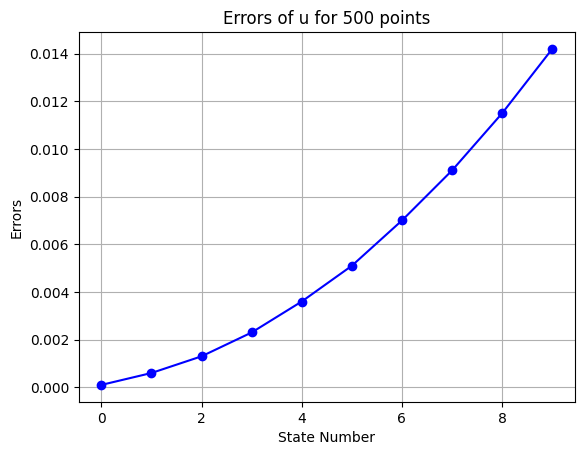

In [12]:
plt.plot(energies_errors, "bo")
plt.plot(energies_errors, "b-")
plt.ylabel("Errors")
plt.xlabel("State Number")
plt.title("Errors of u for 500 points")
plt.savefig("pib_500_errors.png")
plt.grid()





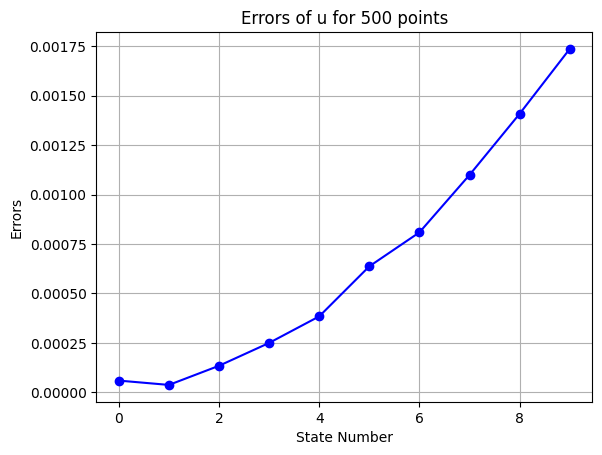

In [13]:
plt.plot(energies_errors_2, "bo")
plt.plot(energies_errors_2, "b-")
plt.ylabel("Errors")
plt.xlabel("State Number")
plt.title("Errors of u for 500 points")
plt.savefig("pib_500_errors_2.png")
plt.grid()